In [1]:
import pyFAI, fabio
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
from pyFAI.gui import jupyter

In [2]:
root = '/nsls2/xf05id1/experiments/2019_cycle3/304976_Turney/'
fn_poni = '20191014_ZnO_std_64274.poni'
ai = pyFAI.load(root + fn_poni)

flag_df = False
flag_output = False


In [3]:
fn = 'auto/scan2D_64398.tif'
fn_tmp = fn.split('.')[0]
# img = fabio.open(root + fn)
# img_array = img.data
img = io.imread(root+fn)
if (img.ndim > 2):
    N = img.shape[0]
    img_array = np.squeeze(np.sum(img, axis=0))
img_array = np.array(img_array, dtype=np.float64)


In [4]:
if (flag_df):
    fn_df = 'scan2D_64320_avg.tif'
    # img_df = fabio.open(root + fn_df).data
    img_df = io.imread(root + fn_df)
    img_df = np.array(img_df, dtype=np.float64)
    img_array = img_array - N * img_df

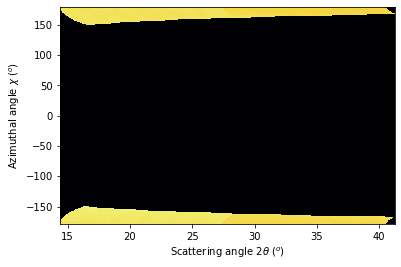

In [5]:
output_fn = None
if (flag_output):
    output_fn = root + fn_tmp + "_pyFAI2D.edf"
res_2d = ai.integrate2d(img_array,
                        2048, 360,
                        unit="2th_deg",
                        filename=output_fn)
jupyter.plot2d(res_2d)

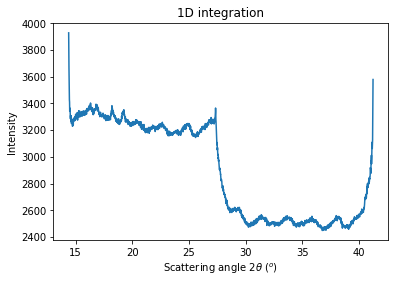

In [6]:
output_fn = None
if (flag_output):
    output_fn = root + fn_tmp + "_pyFAI1D.dat"
res_1d = ai.integrate1d(img_array,
                        2048,
                        unit="2th_deg",
                        filename=output_fn)
jupyter.plot1d(res_1d)